# Welcome to ML Blog Tutorial 3 (Image Data)

This tutorial will present the application of four interpretability techniques in a machine learning task.

## Setup
First, let's install few libraries we need!

In [ ]:
!pip install lime
!pip install eli5
!pip install mlxtend==0.18.0
!pip install pip install scikit-multilearn
!pip install shap
!pip install innvestigate
!pip install tensorflow==1.15.0
!pip install h5py==2.10.0

## Initialise

Then, we will use a pretrainned network "MobileNetV2" to predict the classes of four animals!  

In [ ]:
!wget https://live.staticflickr.com/65535/51975611970_8ec42b57e4_b.jpg
!wget https://live.staticflickr.com/65535/51983987099_d2778fdc23_b.jpg
!wget https://live.staticflickr.com/2512/3970720957_9b0b2ff5a4_o.jpg
!wget https://live.staticflickr.com/7441/10299827583_c75cb0f56d_b.jpg

In [ ]:
import lime.lime_image
import numpy as np
import pandas as pd
import urllib
import re
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import maxabs_scale
import innvestigate
import innvestigate.applications.imagenet
import innvestigate.utils as iutils
import imp
import os
import tensorflow as tf
import keras
import keras.backend
import keras.models
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenetv2 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


We load the pretrained model!

In [ ]:
model = keras.applications.MobileNetV2(
    input_shape=(160,160,3),
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    classes=1000
)

We preprocess our images!

In [ ]:
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (160, 160))
  return image

In [ ]:
img1 = load_img('/content/3970720957_9b0b2ff5a4_o.jpg', target_size=(160, 160))
img2 = load_img('/content/51975611970_8ec42b57e4_b.jpg', target_size=(160, 160))
img3 = load_img('/content/51983987099_d2778fdc23_b.jpg', target_size=(160, 160))
img4 = load_img('/content/10299827583_c75cb0f56d_b.jpg', target_size=(160, 160))
img1 = img_to_array(img1)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)

# reshape data for the model
img1 = img1.reshape((1, img1.shape[0], img1.shape[1], img1.shape[2]))
img2 = img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))
img3 = img3.reshape((1, img3.shape[0], img3.shape[1], img3.shape[2]))
img4 = img4.reshape((1, img4.shape[0], img4.shape[1], img4.shape[2]))

img1 = preprocess_input(img1)
img2 = preprocess_input(img2)
img3 = preprocess_input(img3)
img4 = preprocess_input(img4)

In [ ]:
yhat1 = model.predict(img1)
yhat2 = model.predict(img2)
yhat3 = model.predict(img3)
yhat4 = model.predict(img4)

Text(0.5, 1.0, 'Cat')

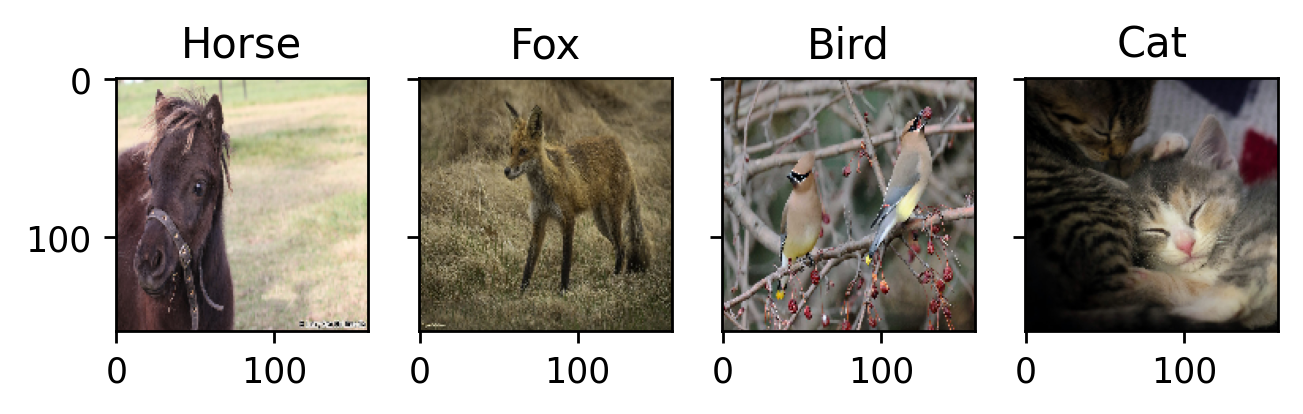

In [ ]:
fig, axs = plt.subplots(1, 4, dpi=250, sharey=True)
axs[0].imshow((img1[0]/2+0.5))
axs[0].set_title('Horse')
axs[1].imshow((img2[0]/2+0.5))
axs[1].set_title('Fox')
axs[2].imshow((img3[0]/2+0.5))
axs[2].set_title('Bird')
axs[3].imshow((img4[0]/2+0.5))
axs[3].set_title('Cat')

We ask our model to make predictions for these images.

In [ ]:
label = decode_predictions(yhat1)
print(np.argmax(yhat1))
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
339
sorrel (20.99%)


In [ ]:
label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

dhole (26.62%)


In [ ]:
label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

bulbul (68.48%)


In [ ]:
label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

tabby (43.46%)


## Explain an example

Finally, we will use a few techniques to explain these predictions. We will start once again with LIME.

  0%|          | 0/5000 [00:00<?, ?it/s]

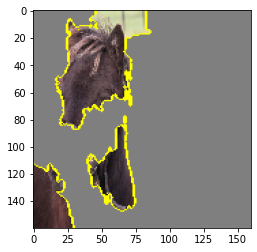

In [ ]:
from skimage.segmentation import mark_boundaries
import lime 

explainer = lime.lime_image.LimeImageExplainer(verbose = False)
explanation = explainer.explain_instance(img1.reshape((160,160,3)).astype('double'), classifier_fn = model.predict, 
                                         top_labels=1, hide_color=None, num_samples=5000)
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp1 / 2 + 0.5, mask1))

  0%|          | 0/5000 [00:00<?, ?it/s]

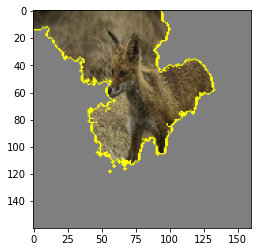

In [ ]:
explainer = lime.lime_image.LimeImageExplainer(verbose = False)
explanation = explainer.explain_instance(img2.reshape((160,160,3)).astype('double'), classifier_fn = model.predict, 
                                         top_labels=1, hide_color=None, num_samples=5000)
temp2, mask2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp2 / 2 + 0.5, mask2))

  0%|          | 0/5000 [00:00<?, ?it/s]

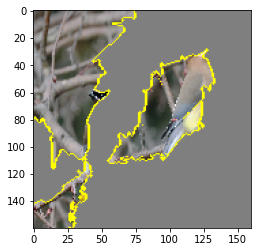

In [ ]:
explainer = lime.lime_image.LimeImageExplainer(verbose = False)
explanation = explainer.explain_instance(img3.reshape((160,160,3)).astype('double'), classifier_fn = model.predict, 
                                         top_labels=1, hide_color=None, num_samples=5000)
temp3, mask3 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp3 / 2 + 0.5, mask3))

  0%|          | 0/5000 [00:00<?, ?it/s]

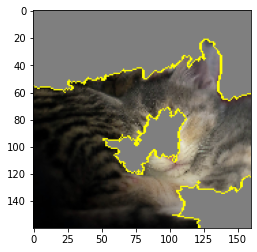

In [ ]:
explainer = lime.lime_image.LimeImageExplainer(verbose = False)
explanation = explainer.explain_instance(img4.reshape((160,160,3)).astype('double'), classifier_fn = model.predict, 
                                         top_labels=1, hide_color=None, num_samples=5000)
temp4, mask4 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp4 / 2 + 0.5, mask4))

Text(0.5, 1.0, 'Cat')

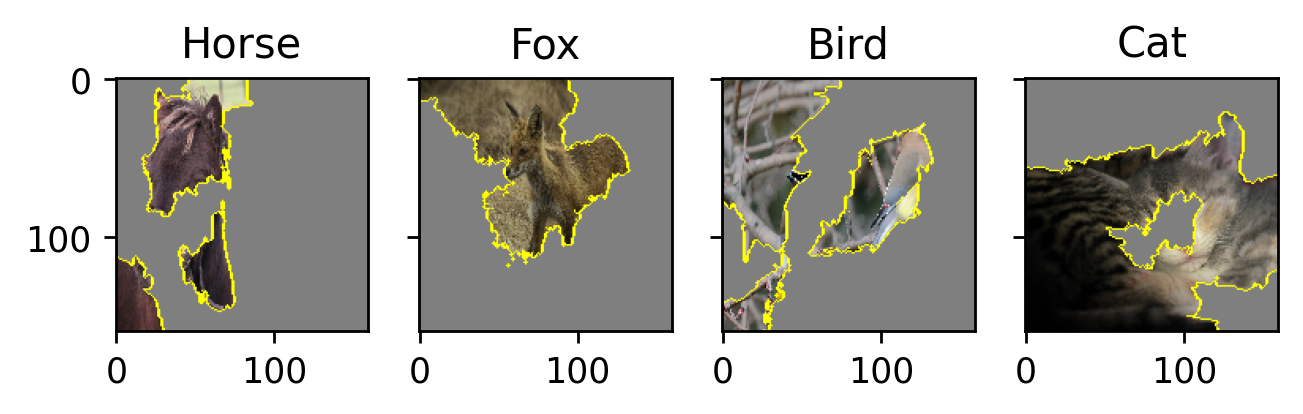

In [ ]:
fig, axs = plt.subplots(1, 4, dpi=250, sharey=True)
axs[0].imshow(mark_boundaries(temp1 / 2 + 0.5, mask1))
axs[0].set_title('Horse')
axs[1].imshow(mark_boundaries(temp2 / 2 + 0.5, mask2))
axs[1].set_title('Fox')
axs[2].imshow(mark_boundaries(temp3 / 2 + 0.5, mask3))
axs[2].set_title('Bird')
axs[3].imshow(mark_boundaries(temp4 / 2 + 0.5, mask4))
axs[3].set_title('Cat')

Then, we will use Integrated Gradients (IG), Guide Backpropagation, InputxGradients and LRP.


In [ ]:
import innvestigate.utils.visualizations as ivis

input_range = (-1,1)
noise_scale = (input_range[1]-input_range[0]) * 0.1

def image(X):
    X = X.copy()
    return ivis.project(X, absmax=255.0, input_is_positive_only=True)

def heatmap(X):
    # X = ivis.gamma(X, minamp=0, gamma=0.95)
    return ivis.heatmap(X)

def bk_proj(X):
    X = ivis.clip_quantile(X, 1)
    return ivis.project(X)

# Methods we use and some properties.
methods = [
    # NAME                    OPT.PARAMS                POSTPROC FXN                TITLE
    # Show input.
    ("input",                 {},                       image,         "Input"),
    ("guided_backprop",       {},                       bk_proj,       "Guided Backprop",),
    ("input_t_gradient",      {},                       heatmap,       "Input * Gradient"),
    ("integrated_gradients",  {"reference_inputs": input_range[0],
                               "steps": 100},           heatmap,       "Integrated Gradients"),
    ("lrp.sequential_preset_a_flat",{"epsilon": 1},     heatmap,       "LRP-PresetAFlat"),
]

In [ ]:
# Create model without trailing softmax
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model)

# Create analyzers.
analyzers = []
for method in methods:
    try:
        analyzer = innvestigate.create_analyzer(method[0],        # analysis method identifier
                                                model_wo_softmax, # model without softmax output
                                                **method[1])      # optional analysis parameters
    except innvestigate.NotAnalyzeableModelException:
        # Not all methods work with all models.
        analyzer = None
    analyzers.append(analyzer)

/usr/local/lib/python3.7/dist-packages/innvestigate/analyzer/base.py:110: UserWarning: LRP is only tested for convolutional neural networks.
Check triggerd by layers: [<keras.layers.advanced_activations.ReLU object at 0x7fdd0b420290>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc767a90>, <keras.layers.advanced_activations.ReLU object at 0x7fdd0ab7c610>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc680a50>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc5f3690>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc5bb990>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc4ea910>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc4c2590>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc439890>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc400e90>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc3447d0>, <keras.layers.advanced_activations.ReLU object at 0x7fdcfc311b10>, <keras.layers.advanced_activ

In [ ]:
channels_first = keras.backend.image_data_format() == "channels_first"
color_conversion = "BGRtoRGB" #if net["color_coding"] == "BGR" else None
images = np.array([img1,img2,img3])#.reshape((3,160,160,3))
analysis = []

for img in images:
    for aidx, analyzer in enumerate(analyzers):
        if methods[aidx][0] == "input":
            # Do not analyze, but keep not preprocessed input.
            a = (img+1)/2
        elif analyzer:
            # Analyze.
            a = analyzer.analyze(img)

            # Apply common postprocessing, e.g., re-ordering the channels for plotting.
            a = iutils.postprocess_images(a, color_conversion, channels_first)
            # Apply analysis postprocessing, e.g., creating a heatmap.
            a = methods[aidx][2](a)
        else:
            a = np.zeros_like(img)
        # Store the analysis.
        analysis.append(a[0]) 

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


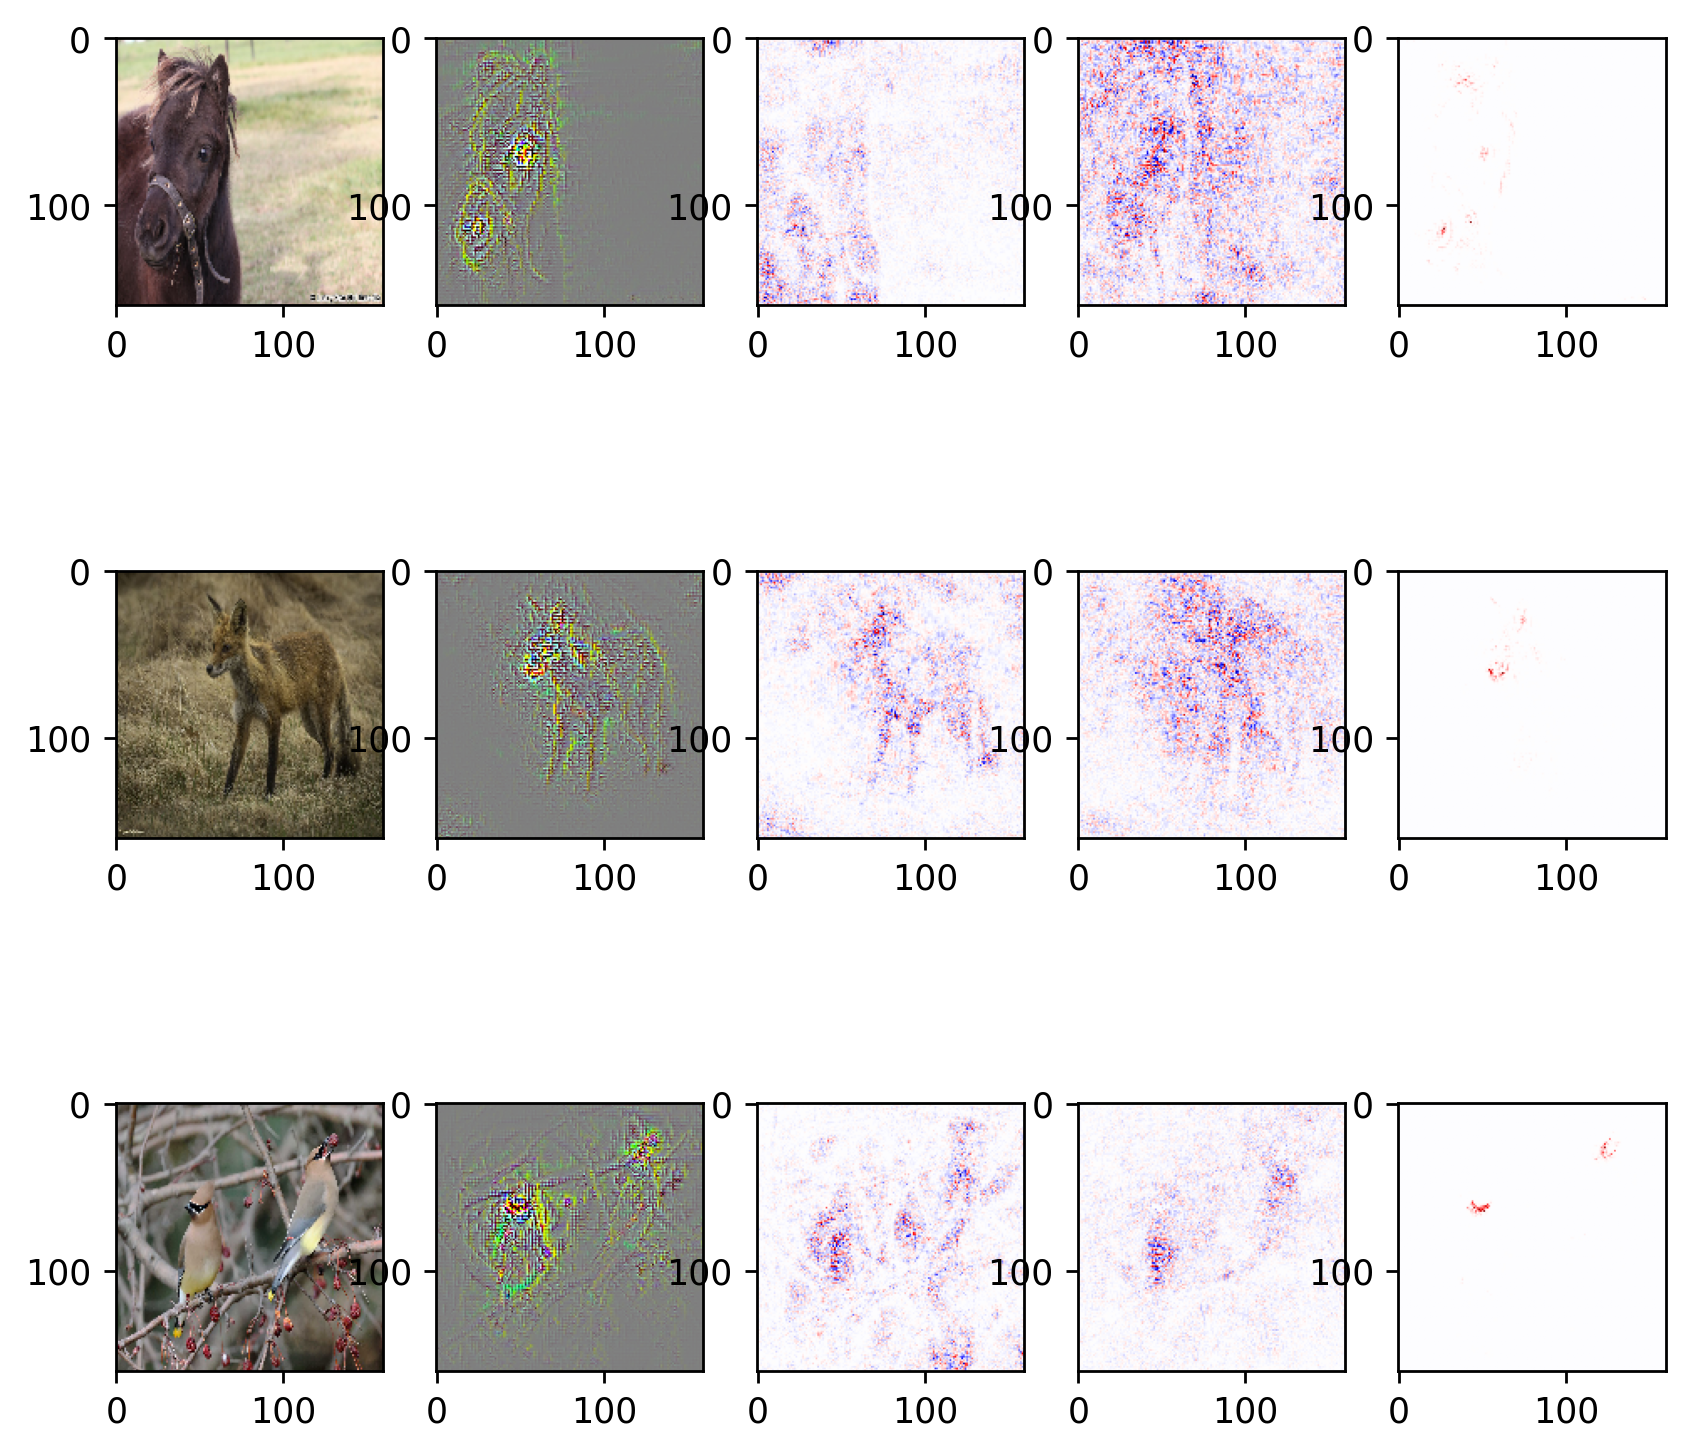

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = 50
h = 50
fig = plt.figure(figsize=(8, 8),dpi=250)#, sharey=True)
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = analysis[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()